# RPM Tumor Time Series Velocity

In [ ]:
# import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import dropkick as dk
# make sure to use position 1
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb
import cellrank as cr
import scanorama
from typing import Any
from copy import copy
from anndata import AnnData
import scipy.sparse as sp
from cellrank.tl.kernels import VelocityKernel
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

## Macrostates: subtypes

In [10]:
class MyKernel(cr.tl.kernels.Kernel):
    def __init__(
        self, adata: AnnData, obs_key: str = "Diffusion Pseudotime", **kwargs: Any
    ):
        super().__init__(adata=adata, obs_key=obs_key, **kwargs)

    def _read_from_adata(self, obs_key: str, **kwargs: Any) -> None:
        super()._read_from_adata(**kwargs)

        print(f"Reading `adata.obs[{obs_key!r}]`")
        self.pseudotime = self.adata.obs[obs_key].values

    def compute_transition_matrix(self, some_parameter: float = 0.5) -> "MyKernel":
        print("Accessing `.pseudotime`: ", self.pseudotime)
        transition_matrix = sp.diags(
            (some_parameter,) * len(self.adata), dtype=np.float64
        )

        self._compute_transition_matrix(transition_matrix)

        return self

    def copy(self) -> "MyKernel":
        return copy(self)

In [11]:
import pickle
g = cr.estimators.GPCCA.read('../../out/RPM-time-series/GPCCA.pickle')

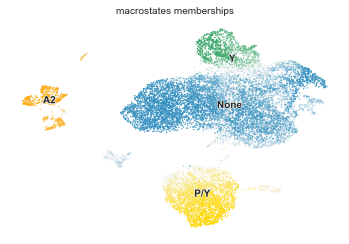

  0%|          | 0/4 [00:00<?, ?/s]

In [12]:
g.compute_macrostates(cluster_key="ParetoTI_specialists") #to change macrostates calcualted by archetype
g.plot_macrostates()
g.compute_terminal_states() 
g.compute_absorption_probabilities(solver="gmres", use_petsc=True)

In [13]:
drivers = g.compute_lineage_drivers(lineages=["A2","P/Y","None",'Y'], return_drivers=True)  #when running macrostates and terminal states by timepoint
drivers
# g.plot_lineage_drivers("None", n_genes=15)

,A2_corr,A2_pval,A2_qval,A2_ci_low,A2_ci_high,P/Y_corr,P/Y_pval,P/Y_qval,P/Y_ci_low,P/Y_ci_high,None_corr,None_pval,None_qval,None_ci_low,None_ci_high,Y_corr,Y_pval,Y_qval,Y_ci_low,Y_ci_high
Gene,,,,,,,,,,,,,,,,,,,,
Ascl1,0.961390,0.0,0.0,0.960165,0.962578,-0.019689,0.015412,0.063352,-0.035608,-0.003760,-0.565019,0.000000e+00,0.000000e+00,-0.575767,-0.554076,-0.625664,0.0,0.0,-0.635263,-0.615872
Ccn3,0.922915,0.0,0.0,0.920518,0.925242,-0.016181,0.046499,0.161947,-0.032103,-0.000251,-0.545655,0.000000e+00,0.000000e+00,-0.556745,-0.534369,-0.598736,0.0,0.0,-0.608859,-0.588418
Bex2,0.908248,0.0,0.0,0.905417,0.910997,-0.019401,0.016979,0.068748,-0.035321,-0.003472,-0.539435,0.000000e+00,0.000000e+00,-0.550633,-0.528043,-0.585658,0.0,0.0,-0.596028,-0.575094
Krt7,0.903242,0.0,0.0,0.900265,0.906134,-0.018107,0.025895,0.098781,-0.034027,-0.002177,-0.528832,0.000000e+00,0.000000e+00,-0.540212,-0.517260,-0.589794,0.0,0.0,-0.600086,-0.579307
Bex4,0.897775,0.0,0.0,0.894640,0.900822,-0.011594,0.153749,0.423800,-0.027519,0.004337,-0.534991,0.000000e+00,0.000000e+00,-0.546266,-0.523523,-0.580228,0.0,0.0,-0.590698,-0.569562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ftl1,-0.551822,0.0,0.0,-0.562805,-0.540645,0.023854,0.003333,0.016493,0.007927,0.039769,0.124855,8.702196e-54,1.107268e-52,0.109142,0.140506,0.534782,0.0,0.0,0.523310,0.546060
Anxa5,-0.589936,0.0,0.0,-0.600225,-0.579451,-0.029332,0.000307,0.001973,-0.045241,-0.013408,0.324218,0.000000e+00,0.000000e+00,0.309888,0.338400,0.420284,0.0,0.0,0.407080,0.433313
S100a6,-0.641189,0.0,0.0,-0.650475,-0.631711,-0.007879,0.332383,0.737746,-0.023806,0.008052,0.188351,1.268310e-121,3.465586e-120,0.172940,0.203670,0.595979,0.0,0.0,0.585609,0.606154


In [14]:
drivers.to_csv('../../out/RPM-time-series/drivers_all.csv')

In [17]:
for i in drivers.sort_values(by="P/Y_corr", ascending=False).index[0:40]:
    print(i)
#https://maayanlab.cloud/Enrichr/enrich?dataset=e2be46d36f2d42c226ef6eef1856ca48 X
# https://maayanlab.cloud/Enrichr/enrich?dataset=1c6442e396836fd9187091b4fa587083 Y

Nxpe2
Ncl
Hsph1
Rrp12
Hspd1
Ddx21
Hspa4
Nolc1
Lrrc59
Ddx3x
Gm29050
Mdn1
Hnrnpab
Set
Pno1
Kpnb1
Bms1
Gm10160
Ifrd1
Utp20
Eif4g1
Mybbp1a
Eif3b
Mak16
Pa2g4
Bcat1
Utp18
Ppa1
Txnrd1
Rbm28
Hnrnpu
Bysl
Hspe1
Timm13
Eif3a
Dnajc2
Ipo5
Abce1
Anln
Nat10


In [18]:
genes = pd.read_csv("./Combined-drivers/string_interactions_short (4).tsv", delimiter='\t')

In [25]:
adata = cr.read('../../out/RPM-time-series/adata_04_by-timepoint_CR.h5ad')


/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  """Entry point for launching an IPython kernel.


In [32]:
tfs =  ['MYC', 'MYCN', 'MYCL', 'MAX', 'MGA', 'MXD1', 'MXI1', 'MXD3', 'MXD4', 'MNT', 'MLX', 'MLXIP', 'MLXIPL', 'SMARCA4', 'BRG1', 'HEF5',
'ZNF383', 'ZNF684', 'ZNF76', 'ZNF181', 'ZNF814', 'KMT2C', 'POU6F2','HOXC9','SP5','KLF3','ZNF317','ZNF572','HIVEP3','ZNF551','HOXA1','ZNF771',
'CERS4','PAX9','TGIF2','ZNF682','ZBTB8B','ZNF329','ZNF729','ZNF740','ZNF468','ZNF281','ZNF726','POU4F3','ZNF100','ZNF808','FOXM1','FOXI1',
'MAFG','ZFP41','ZNF416','ZNF681','ZNF85','ZNF582' 'HES5', 'ZNF80', 'ZNF219', 'TFAP2C', 'EPAS1', 'MECP2', 'NHLH1', 'CEBPE', 'TFE3', 'E2F5', 'E2F1',
'JUND', 'ZFX', 'NR2F2', 'MBD2', 'FOXP3', 'LHX2', 'HEY1', 'SRY', 'TGIF2', 'ZNF337', 'HSFX1', 'NFATC4', 'ZNF500', 'TP53', 'MECOM', 'PITX2', 'PKNOX2',
'ZNF684', 'STAT4', 'ZNF701', 'TBX6', 'ZSCAN5B', 'LHX2', 'ZNF660', 'ZNF287', 'ZSCAN12', 'ZNF836', "NEUROD1",'ASCL1', "POU2F3",'YAP1',
       'SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
        'ATF2',
       'ATF3',
       'BRCA1',
       'BRD4',
       'CEBPA',
       'CEBPB',
       'CLOCK',
       'CNOT3',
       'CTCF',
       'E2F1',
       'E2F4',
       'E2F6',
       'EGR1',
       'ELF3',
       'ELK3',
       'EOMES',
       'EP300',
       'ERCC6',
       'FOXA1',
       'FOXM1',
       'GATA2',
       'GATA3',
       'GATA6',
       'HDAC2',
       'HOXC9',
       'HSF1',
       'JUN',
       'JUND',
       'KAT2A',
       'KDM2B',
       'KDM6A',
       'KLF1',
       'KLF4',
       'KLF5',
       'KLF6',
       'MAF',
       'MAX',
       'MECOM',
       'MYB',
       'MYBL2',
       'MYC',
       'MYCN',
       'NANOG',
       'NCOR1',
       'NELFE',
       'NFYA',
       'NFYB',
       'NR1H3',
       'PBX3',
       'PML',
       'POU5F1',
       'PPARG',
       'RARG',
       'RELA',
       'RUNX1',
       'RUNX2',
       'SIN3A',
       'SMAD2',
       'SMAD3',
       'SMARCA4',
       'SOX2',
       'SOX3',
       'SPI1',
       'SRY',
       'STAG1',
       'STAT5A',
       'TAF1',
       'TAF7',
       'TAF7L',
       'TBP',
       'TCF21',
       'TCF3',
       'TFAP2C',
       'TRP63',
       'TTF2',
       'USF1',
       'XRN2',
       'ZBTB33',
       'ZFP217',
       'ZFP281',
       'ZFP42',
       'ZFX',
       'ZMIZ1']

In [33]:
tfs_keep = []
for i in np.unique(tfs):
    if i.capitalize() in adata.var_names:
        tfs_keep.append(i)

In [35]:
np.array(tfs_keep)

array(['ASCL1', 'ASCL2', 'ATF2', 'ATF3', 'AVIL', 'BACH2', 'BCL3',
       'BHLHE22', 'BRCA1', 'BRD4', 'CEBPA', 'CEBPB', 'CEBPD', 'CEBPE',
       'CERS4', 'CLOCK', 'CNOT3', 'CTCF', 'CXXC1', 'DLX5', 'DLX6', 'E2F1',
       'E2F4', 'E2F5', 'E2F6', 'EBF1', 'EGR1', 'ELF3', 'ELK3', 'EOMES',
       'EP300', 'EPAS1', 'ERCC6', 'ETS2', 'ETV4', 'ETV6', 'FLI1', 'FOSL1',
       'FOXA1', 'FOXA2', 'FOXJ3', 'FOXM1', 'FOXN4', 'FOXP3', 'GATA2',
       'GATA3', 'GATA4', 'GATA6', 'GLI1', 'GRIP1', 'HDAC2', 'HES1',
       'HES6', 'HEY1', 'HIVEP3', 'HMG20B', 'HOXA1', 'HOXB5', 'HSF1',
       'INSM1', 'ISL1', 'ISL2', 'JUN', 'JUND', 'KAT2A', 'KAT8', 'KDM2B',
       'KDM6A', 'KLF1', 'KLF12', 'KLF2', 'KLF3', 'KLF4', 'KLF5', 'KLF6',
       'KMT2C', 'LHX2', 'LYAR', 'MAF', 'MAFG', 'MAX', 'MBD1', 'MBD2',
       'MECOM', 'MECP2', 'MGA', 'MITF', 'MLX', 'MLXIP', 'MLXIPL', 'MNT',
       'MTA1', 'MXD1', 'MXD3', 'MXD4', 'MXI1', 'MYB', 'MYBL2', 'MYC',
       'MYCL', 'MYCN', 'MYT1', 'NANOG', 'NCOR1', 'NELFE', 'NFATC4',
       

In [36]:
adata

AnnData object with n_obs × n_vars = 15138 × 19455
    obs: 'Diffusion Pseudotime', 'Monocle Pseudotime', 'Clusters', '_X', '_Y', 'batch', 'doublet_scores', 'predicted_doublets', 'timepoint', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'barcode', 'ireland_barcode', 'M', 'E', 'clusters_gradients', 'S_score', 'G2M_score', 'phase', 'cell_cycle_diff', 'specialists_pca_diffdist', 'SCLC-Y_Score', 'SCLC-P_Score', 'SCLC-N_Score', 'SCLC-A2_Score', 'SCLC-A_Score', 'Phenotype', 'SCLC-A_Score_pos', 'SCLC-A2_Score_pos', 'SCLC-N_Score_pos', 'SCLC-P_Score_pos', 'SCLC-Y_Score_pos', 'arc_pheno', 'arc_aa_type', 'ParetoTI_specialists', 'subtype', 'subtype_labeled', 'velocity_self_transition', 'terminal_states', 'terminal_states_probs'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'mean', 'std', 'n_cells', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_

In [39]:
scv.utils.get_extrapolated_state(adata)

array([[1.89463801e-02, 1.08869529e+00, 4.96026428e+00, ...,
        3.45695096e+00, 0.00000000e+00, 3.01874362e-01],
       [2.88501806e-02, 6.81098955e-01, 4.88436727e+00, ...,
        3.59925398e+00, 0.00000000e+00, 3.25861892e-01],
       [2.30842297e-02, 1.96073186e+00, 4.58620798e+00, ...,
        4.88849212e+00, 0.00000000e+00, 4.68017547e-01],
       ...,
       [5.73181810e-05, 8.71958036e-01, 2.03434698e+00, ...,
        2.22221471e+00, 0.00000000e+00, 1.38224385e+00],
       [1.00907230e-04, 5.18322278e-01, 4.39133860e+00, ...,
        5.26839343e+00, 0.00000000e+00, 8.58427875e-01],
       [0.00000000e+00, 3.29026283e-01, 2.60850937e+00, ...,
        3.24417004e+00, 0.00000000e+00, 3.48009279e-01]])

In [47]:
set(adata.var.loc[adata.var.velocity_genes == True].index).intersection(set([i.capitalize() for i in tfs_keep]))


{'Atf3',
 'Brca1',
 'Cebpa',
 'Cers4',
 'Ctcf',
 'Elk3',
 'Ets2',
 'Fosl1',
 'Hes1',
 'Hivep3',
 'Klf3',
 'Klf4',
 'Mxi1',
 'Myb',
 'Mybl2',
 'Myt1',
 'Nfkb2',
 'Nfkbiz',
 'Pbx3',
 'Pou6f2',
 'Prox1',
 'Rcor2',
 'Rela',
 'Relb',
 'St18',
 'Tead2',
 'Tox',
 'Tox3',
 'Xrn2',
 'Zbtb8b',
 'Zkscan2'}

In [38]:
import magic
directory = 'timepoints'
clusters = 'ParetoTI_specialists'
genes = list(set(tfs_keep).intersection(set(adata.var_names)))
magic_operator = magic.MAGIC(verbose=True, solver='approximate')
adata.layers['t0'] = magic_operator.fit_transform(adata.layers['Ms'])
adata.layers['t1'] = magic_operator.transform(scv.utils.get_extrapolated_state(adata))
t0 = pd.DataFrame(adata[:, genes].layers['t0'], index=adata.obs_names, columns=genes)
t0.to_csv(f'./{directory}/t0_{fname}.csv')

t1 = pd.DataFrame(adata[:, genes].layers['t1'], index=adata.obs_names, columns=genes)
t1.to_csv(f'./{directory}/t1_{fname}.csv')

network_clusters = pd.DataFrame(adata.obs[clusters])
network_clusters.to_csv(f'./{directory}/{fname}_clusters.csv')

Calculating MAGIC...
  Running MAGIC on 15138 cells and 19455 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 10.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 11.04 seconds.
    Calculating affinities...
    Calculated affinities in 12.04 seconds.
  Calculated graph and diffusion operator in 33.73 seconds.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 36.71 seconds.
Calculating PCA...
Calculated PCA in 4.24 seconds.
Calculating imputation...
Calculated imputation in 0.07 seconds.


ValueError: Value passed for key 't1' is of incorrect shape. Values of layers must match dimensions (0, 1) of parent. Value had shape (15138, 3415) while it should have had (15138, 19455).